# A simple network using Keras

In [2]:
import tensorflow as tf
import random
import numpy as np

from tensorflow.python import keras

from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils

## Load MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix X shape", X_train.shape)
print("Testing matrix X shape", X_test.shape)

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print("Training matrix Y shape", Y_train.shape)
print("Testing matrix Y shape", Y_test.shape)

11493376/11490434 [==============================] - 5s 0us/step
Training matrix X shape (60000, 784)
Testing matrix X shape (10000, 784)
Training matrix Y shape (60000, 10)
Testing matrix Y shape (10000, 10)


### Display a sample

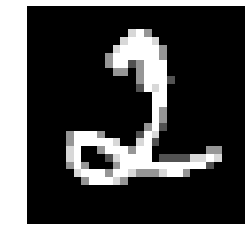

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

random_index = random.randint(0,len(x_train))

plt.imshow(x_train[random_index], cmap='Greys_r')
plt.axis('off')
plt.show()

## Create a simple fully connect network
Take as in imput a digit number (hot encoded)

In [6]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(256, input_shape=(10,)))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(784))
model.add(Activation('sigmoid'))

### compile

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

### train

In [8]:
model.fit(x=Y_train, y=X_train,
          batch_size=128, epochs=4,
          verbose=1,
          validation_data=(Y_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 5s 81us/step - loss: 591.6621 - val_loss: 583.4598
Epoch 2/4
60000/60000 [==============================] - 4s 73us/step - loss: 576.9601 - val_loss: 583.0143
Epoch 3/4
60000/60000 [==============================] - 4s 72us/step - loss: 576.7511 - val_loss: 583.0249
Epoch 4/4
60000/60000 [==============================] - 4s 72us/step - loss: 576.6814 - val_loss: 582.9404


# Generate digits

In [9]:
def predict_and_show(digit):
    predicted = model.predict(digit)
    predicted *= 255.
    predicted = predicted.reshape(28,28)
    #print(predicted)

    plt.imshow(predicted, cmap='Greys_r')
    plt.axis('off')
    plt.show()

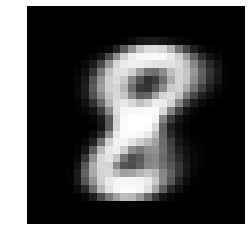

In [13]:
my_digit = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 2, 0]])

predict_and_show(my_digit)